In [18]:
from skimage import io

from skimage.filters import roberts, scharr, prewitt, sobel, hessian, frangi, sato, threshold_yen
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.exposure import equalize_hist
from skimage.measure import label, regionprops, regionprops_table
from skimage.morphology import erosion, dilation
from skimage.feature import greycomatrix, greycoprops

from matplotlib import pyplot as plt

import os
import numpy as np
import pandas as pd

from skimage.filters import gaussian

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

from matplotlib import pyplot as plt
from skimage.transform import rescale, resize, downscale_local_mean
import numpy as np
from skimage import io, color, img_as_ubyte
from skimage.measure import label, regionprops, regionprops_table
from skimage.feature import hog, corner_moravec, greycomatrix, greycoprops, canny
from skimage.exposure import equalize_hist
from skimage.filters import sato
from skimage import data, exposure, feature
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix 
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB


import os
import glob


from scipy.stats import mannwhitneyu, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd


"""
HOG + HARALICK
"""


In [19]:
def HOGex(img, path):
    H = feature.hog(img, orientations=orientation, pixels_per_cell=pixelspercell, cells_per_block=cellsperblock,
            transform_sqrt=True, block_norm="L1")
    return H
def GLCMex(img, path):
    glcm = greycomatrix(img, 
            distances=distances, 
            angles=angles,
            symmetric=symmetric,
            normed=normed)
    properties=['contrast', 'dissimilarity', 'homogeneity', 'energy',
                        'correlation', 'ASM']
    feats = np.hstack([greycoprops(glcm, prop).ravel() for prop in properties])
    return feats



def imageloader(paths, filter_on=False, norm=False, test=False, properties=['contrast', 'dissimilarity', 'homogeneity', 'energy',
                          'correlation', 'ASM']):
    for path in paths:
        print(path)
        for i, image_path in enumerate(os.listdir(path)):
            if not image_path.startswith('.'):
                if test == True:
                    if i > 5:
                        break
                print(f"{i+1} of {len(os.listdir(path))}")  
                input_path = os.path.join(path, image_path)
                img = io.imread(input_path, as_gray=True)
                img = resize(img, (yy, xx))
                if norm == True:
                    img= equalize_hist(img)
                if filter_on == True:
                    img= sato(img)
                img = img_as_ubyte(img)
                """
                featureextraction
                """
                H = HOGex(img, path)
                feats = GLCMex(img, path)
                """
                store
                """
                datahog.append(H)
                dataglcm.append(feats)
                globalfeat = np.hstack([H, feats])
                globalfeats.append(globalfeat)
                if path == paths[0]:
                    flg=1
                    globallabels.append(flg)
                    labelsglcm.append(flg)
                    labelshog.append(flg)
                if path == paths[1]:
                    flg=0
                    globallabels.append(flg)
                    labelsglcm.append(flg)
                    labelshog.append(flg)

def GLCMHOGtest():
    for name, model in models:
        kfold = KFold(n_splits=kfoldsplits) #random_state=seed)
        cv_results = cross_val_score(model, trainDataGlobal, trainLabelsGlobal, cv=kfold, scoring=scoring)
        results.append(cv_results)
        print(f"results: {cv_results}")
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    # boxplot algorithm comparison
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.boxplot(results)
#    showmeans=True
    ax.set_xticklabels(names)
    plt.show()
    
def GLCMHOGtest2():
    for name, model in models:
        kfold = KFold(n_splits=kfoldsplits) #random_state=seed)
        cv_results = cross_val_score(model, trainDataGlobal, trainLabelsGlobal, cv=kfold, scoring=scoring)
        results.append(cv_results)
        #print(f"results: {cv_results}")
        names.append(name)
        print(f"{name}: mean is {cv_results.mean()*100:.1f}% with SD {cv_results.std()*100.0:.1f}")
    # boxplot algorithm comparison
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.boxplot(results)
#    showmeans=True
    ax.set_xticklabels(names)
    plt.show()
            #msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    
    
print("done")



done


In [66]:
base_dir = '/Users/L/Downloads/palmarhyperlinearity/'
base_dir_thenar = '/Users/L/Downloads/palmarhyperlinearity/thenarversionall2/'
base_dir_p = '/Users/L/Downloads/palmarhyperlinearity/palmarversionall2/'

train_dir_flg_thenar = os.path.join(base_dir_thenar, 'flg')
train_dir_wt_thenar = os.path.join(base_dir_thenar, 'wtupdated')

train_dir_flg_palm = os.path.join(base_dir_p, 'flg')
train_dir_wt_palm = os.path.join(base_dir_p, 'wt')


print(f"Thenar WT photo count: {len(os.listdir(train_dir_wt_thenar))}")
print(f"Palmar WT photo count: {len(os.listdir(train_dir_wt_palm))}")

print(f"Thenar FLG photo count: {len(os.listdir(train_dir_flg_thenar))}")
print(f"Palmar FLG photo count: {len(os.listdir(train_dir_flg_palm ))}")

print(f"TOTAL photo count: {(len(os.listdir(train_dir_flg_palm))+len(os.listdir(train_dir_wt_palm)))}")

hetero = os.path.join(base_dir_p, 'het')
homo = os.path.join(base_dir_p, 'homo')
print(f"hrtro photo count: {len(os.listdir(hetero))}") ##I THINK THIS INCLUDES .FILE
print(f"homor photo count: {len(os.listdir(homo))}")
flg2 = os.path.join(base_dir_p, 'flg2')
print(f"joint photo count: {len(os.listdir(flg2))}") 


Thenar WT photo count: 325
Palmar WT photo count: 325
Thenar FLG photo count: 208
Palmar FLG photo count: 208
TOTAL photo count: 533
hrtro photo count: 180
homor photo count: 29
joint photo count: 208


29


'\nfor fname in os.listdir(homo):\n    if not fname.startswith(\'.\'):\n        if fname in os.listdir(flg2):\n            thisisfantastic = \'achieved\'\n        else:\n            print(f"this wasn\'t copied: {fname}")\n            \n            \nfor fname in os.listdir(hetero):\n    #if not fname.startswith(\'.\'):\n    if fname in os.listdir(homo):\n        print(f"this duplocaye\'t copied: {fname}")\n    else:\n        expected=\'yes\'\n'

In [21]:
##Joint settings
yy = 128  *4
xx = 64 * 4

###GLCM settings
distances = [1, 2, 4] 
angles = [0, np.pi/4, np.pi/2]
    #angles = [0, np.pi/4, np.pi/3]
symmetric=False
normed=True
properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy',
                          'correlation', 'ASM']
###HOG settings
orientation=9
cellsperblock = (2, 2)
pixelspercell = (16, 16)



###lists
datahog = []
labelshog = []
dataglcm = []
labelsglcm = []
globalfeats = []
globallabels = []


###LISTS
datahog = []
labelshog = []
dataglcm = []
labelsglcm = []
globalfeats = []
globallabels = []

###FLG MUST BE PATH[0]
paths = [train_dir_flg_thenar, train_dir_wt_thenar]
imageloader(paths, filter_on=False, norm=False)

seed      = 9



/Users/L/Downloads/palmarhyperlinearity/thenarversionall2/flg
1 of 209
2 of 209
3 of 209
4 of 209
5 of 209
6 of 209
7 of 209
8 of 209
9 of 209
10 of 209
11 of 209
12 of 209
13 of 209
14 of 209
15 of 209
16 of 209
17 of 209
18 of 209
19 of 209
20 of 209
21 of 209
22 of 209
23 of 209
24 of 209
25 of 209
26 of 209
27 of 209
28 of 209
29 of 209
30 of 209
31 of 209
32 of 209
33 of 209
34 of 209
35 of 209
37 of 209
38 of 209
39 of 209
40 of 209
41 of 209
42 of 209
43 of 209
44 of 209
45 of 209
46 of 209
47 of 209
48 of 209
49 of 209
50 of 209
51 of 209
52 of 209
53 of 209
54 of 209
55 of 209
56 of 209
57 of 209
58 of 209
59 of 209
60 of 209
61 of 209
62 of 209
63 of 209
64 of 209
65 of 209
66 of 209
67 of 209
68 of 209
69 of 209
70 of 209
71 of 209
72 of 209
73 of 209
74 of 209
75 of 209
76 of 209
77 of 209
78 of 209
79 of 209
80 of 209
81 of 209
82 of 209
83 of 209
84 of 209
85 of 209
86 of 209
87 of 209
88 of 209
89 of 209
90 of 209
91 of 209
92 of 209
93 of 209
94 of 209
95 of 209
96 of 2

In [22]:
###GLCM TESTING 1 OF 2
print("[INFO] training classifier...")
models = []
models.append(('3NN', KNeighborsClassifier(n_neighbors=3)))
models.append(('5NN', KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM-L', LinearSVC(random_state=seed, dual=False)))
models.append(('SVM-rbf', svm.SVC(kernel='rbf')))
print("done")

test_size=0.10
seed=9
kfoldsplits=10
datasetx = dataglcm
labelsx = labelsglcm
trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal = train_test_split(np.array(datasetx),
                                                                                          np.array(labelsx),
                                                                                          test_size=test_size,
                                                                                          random_state=seed                                                                           #shuffle=True) 
                                                                                                    
print("[STATUS] splitted train and test data...")
print("Train data  : {}".format(trainDataGlobal.shape))
print("Test data   : {}".format(testDataGlobal.shape))
print("Train labels: {}".format(trainLabelsGlobal.shape))
print("Test labels : {}".format(testLabelsGlobal.shape))



[INFO] training classifier...
done
[STATUS] splitted train and test data...
Train data  : (478, 54)
Test data   : (54, 54)
Train labels: (478,)
Test labels : (54,)


In [1]:
####GLCM 2 V2 tehnar

from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
specificity = make_scorer(recall_score, pos_label=0) #The label 0 is usually the negative class in a binary problem.
sensitivity = make_scorer(recall_score, pos_label=1)


results = []
names   = []

#scoring = 'accuracy'
#scoring = sensitivity
scoring = specificity


GLCMHOGtest2()                    



In [3]:
#

In [4]:
#

In [40]:
# get the overall feature vector size
print("[STATUS] feature vector size {}".format(np.array(globalfeats).shape))

# get the overall training label size
print("[STATUS] training Labels {}".format(np.array(globallabels).shape))


[STATUS] feature vector size (502, 16794)
[STATUS] training Labels (502,)


In [5]:
#

In [65]:
"""
Analysis palms
"""
yy = 128 #*4
xx = 64 #* 4
###GLCMg
distances = [1, 2, 4] 
angles = [0, np.pi/4, np.pi/3]
symmetric=False
normed=True
properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy',
                          'correlation', 'ASM']
###HOGh
orientation=9
cellsperblock = (2, 2)
pixelspercell = (16, 16)

datahog = []
labelshog = []
dataglcm = []
labelsglcm = []
globalfeats = []
globallabels = []

###FLG MUST BE PATH[0]
paths =
 [train_dir_flg_palm, train_dir_wt_palm]
imageloader(paths, filter_on=False, norm=False)

num_trees = 100
seed      = 9





/Users/L/Downloads/palmarhyperlinearity/palmarversionall2/flg
1 of 209
2 of 209
3 of 209
4 of 209
5 of 209
6 of 209
7 of 209
8 of 209
9 of 209
10 of 209
11 of 209
12 of 209
13 of 209
14 of 209
15 of 209
16 of 209
17 of 209
18 of 209
19 of 209
20 of 209
21 of 209
22 of 209
23 of 209
24 of 209
25 of 209
26 of 209
27 of 209
28 of 209
29 of 209
30 of 209
31 of 209
32 of 209
33 of 209
35 of 209
36 of 209
37 of 209
38 of 209
39 of 209
40 of 209
41 of 209
42 of 209
43 of 209
44 of 209
45 of 209
46 of 209
47 of 209
48 of 209
49 of 209
50 of 209
51 of 209
52 of 209
53 of 209
54 of 209
55 of 209
56 of 209
57 of 209
58 of 209
59 of 209
60 of 209
61 of 209
62 of 209
63 of 209
64 of 209
65 of 209
66 of 209
67 of 209
68 of 209
69 of 209
70 of 209
71 of 209
72 of 209
73 of 209
74 of 209
75 of 209
76 of 209
77 of 209
78 of 209
79 of 209
80 of 209
81 of 209
82 of 209
83 of 209
84 of 209
85 of 209
86 of 209
87 of 209
88 of 209
89 of 209
90 of 209
91 of 209
92 of 209
93 of 209
94 of 209
95 of 209
96 of 2

In [69]:
"""
GLCM Test 1/2 Palms
"""
print("[INFO] training classifier...")
models = []

models.append(('3NN', KNeighborsClassifier(n_neighbors=3)))
models.append(('5NN', KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM-L', LinearSVC(random_state=seed, dual=False)))
models.append(('SVM-rbf', svm.SVC(kernel='rbf')))
print("done")

test_size=0.1
kfoldsplits=9
seed=9

datasetx = dataglcm
labelsx = labelsglcm
trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal = train_test_split(np.array(datasetx),
                                                                                          np.array(labelsx),
                                                                                          test_size=test_size,
                                                                                          random_state=seed)
                                                                                          #shuffle=True) 
                                                                                                    
print("[STATUS] splitted train and test data...")
print("Train data  : {}".format(trainDataGlobal.shape))
print("Test data   : {}".format(testDataGlobal.shape))
print("Train labels: {}".format(trainLabelsGlobal.shape))
print("Test labels : {}".format(testLabelsGlobal.shape))



[INFO] training classifier...
done
[STATUS] splitted train and test data...
Train data  : (478, 54)
Test data   : (54, 54)
Train labels: (478,)
Test labels : (54,)


In [71]:
"""
HOG Test 1/2 Palms
"""


datasetx = datahog
labelsx = labelshog
trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal = train_test_split(np.array(datasetx),
                                                                                          np.array(labelsx),
                                                                                          test_size=test_size,
                                                                                            random_state=seed)
                                                                                       #,                                                                   )
print("Split train and test")
print("Train data  : {}".format(trainDataGlobal.shape))
print("Test data   : {}".format(testDataGlobal.shape))
print("Train labels: {}".format(trainLabelsGlobal.shape))
print("Test labels : {}".format(testLabelsGlobal.shape))


Split train and test
Train data  : (478, 756)
Test data   : (54, 756)
Train labels: (478,)
Test labels : (54,)


In [81]:
"""
GLCM Test 1/2 Palms
"""
print("[INFO] training classifier...")
models = []
#models.append(('LogReg', LogisticRegression(random_state=seed)))
models.append(('3NN', KNeighborsClassifier(n_neighbors=3)))
models.append(('5NN', KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM-L', LinearSVC(random_state=seed, dual=False)))
models.append(('SVM-rbf', svm.SVC(kernel='rbf')))
print("done")

test_size=0.1
kfoldsplits=9
seed=9

datasetx = dataglcm
labelsx = labelsglcm
trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal = train_test_split(np.array(datasetx),
                                                                                          np.array(labelsx),
                                                                                          test_size=test_size,
                                                                                          random_state=seed)
                                                                                          #shuffle=True) 
                                                                                                    
print("[STATUS] splitted train and test data...")
print("Train data  : {}".format(trainDataGlobal.shape))
print("Test data   : {}".format(testDataGlobal.shape))
print("Train labels: {}".format(trainLabelsGlobal.shape))
print("Test labels : {}".format(testLabelsGlobal.shape))


[INFO] training classifier...
done
[STATUS] splitted train and test data...
Train data  : (478, 54)
Test data   : (54, 54)
Train labels: (478,)
Test labels : (54,)


In [23]:
"""
NEW GLCM
"""

'\nNEW GLCM\n'

In [81]:
###GLCM TESTING 1 OF 2 thenar
print("[INFO] training classifier...")
models = []
models.append(('3NN', KNeighborsClassifier(n_neighbors=3)))
models.append(('5NN', KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM-L', LinearSVC(random_state=seed, dual=False)))
models.append(('SVM-rbf', svm.SVC(kernel='rbf')))
print("done")

test_size=0.10
seed=9
kfoldsplits=10
datasetx = dataglcm
labelsx = labelsglcm
trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal = train_test_split(np.array(datasetx),
                                                                                          np.array(labelsx),
                                                                                          test_size=test_size,
                                                                                          random_state=seed)
                                                                                          #shuffle=True) 
                                                                                                    
print("[STATUS] splitted train and test data...")
print("Train data  : {}".format(trainDataGlobal.shape))
print("Test data   : {}".format(testDataGlobal.shape))
print("Train labels: {}".format(trainLabelsGlobal.shape))
print("Test labels : {}".format(testLabelsGlobal.shape))





[INFO] training classifier...
done
[STATUS] splitted train and test data...
Train data  : (477, 54)
Test data   : (54, 54)
Train labels: (477,)
Test labels : (54,)


In [87]:
###HOG TESTING 1 OF 2

datasetx = datahog
labelsx = labelshog
trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal = train_test_split(np.array(datasetx),
                                                                                          np.array(labelsx),
                                                                                          test_size=test_size,
                                                                                            random_state=seed)
                                                                                       #,                                                                   )
print("split train and test data...")
print("Train data  : {}".format(trainDataGlobal.shape))
print("Test data   : {}".format(testDataGlobal.shape))
print("Train labels: {}".format(trainLabelsGlobal.shape))
print("Test labels : {}".format(testLabelsGlobal.shape))






split train and test data...
Train data  : (477, 16740)
Test data   : (54, 16740)
Train labels: (477,)
Test labels : (54,)


3NN: mean is 13.4% with SD 6.0
5NN: mean is 8.3% with SD 7.5
RF: mean is 20.6% with SD 10.4
SVM-L: mean is 42.7% with SD 7.7
SVM-rbf: mean is 7.1% with SD 6.0


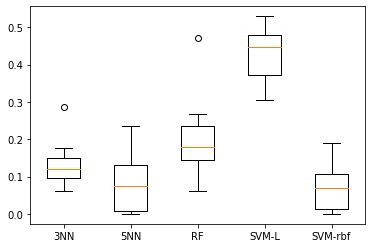

'\n For each metric you can calculate mean and std value by using:\n np.mean(results[value]) \n and \n np.std(results[value])\n , where value - one of your specified metric name.\n'

In [89]:
###HOG TESTING 2 OF 2
###GLCM 2 V2

from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
specificity = make_scorer(recall_score, pos_label=0) #The label 0 is usually the negative class in a binary problem.
sensitivity = make_scorer(recall_score, pos_label=1)


results = []
names   = []
#scoring = 'accuracy'
#scoring = sensitivity
scoring = specificity


GLCMHOGtest2()                    

   

"""
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_validate
iris = load_iris()
scoring = ['precision', 'recall', 'f1']
clf = SVC(kernel='linear', C=1, random_state=0)
scores = cross_validate(clf, iris.data, iris.target == 1, cv=5,
                        scoring=scoring, return_train_score=False)
"""

"""
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}
"""

"""
 For each metric you can calculate mean and std value by using:
 np.mean(results[value]) 
 and 
 np.std(results[value])
 , where value - one of your specified metric name.
"""
                    



In [67]:
"""
Analysis palms
"""
yy = 128 #*4
xx = 64 #* 4
###GLCMg
distances = [1, 2, 4] 
angles = [0, np.pi/4, np.pi/3]
symmetric=False
normed=True
properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy',
                          'correlation', 'ASM']
###HOGh
orientation=9
cellsperblock = (2, 2)
pixelspercell = (16, 16)

datahog = []
labelshog = []
dataglcm = []
labelsglcm = []
globalfeats = []
globallabels = []

###FLG MUST BE PATH[0]
paths = [train_dir_flg_palm, train_dir_wt_palm]
imageloader(paths, filter_on=False, norm=False)

num_trees = 100
seed      = 9






/Users/L/Downloads/palmarhyperlinearity/palmarversionall2/flg
1 of 208
2 of 208
3 of 208
4 of 208
5 of 208
6 of 208
7 of 208
8 of 208
9 of 208
10 of 208
11 of 208
12 of 208
13 of 208
14 of 208
15 of 208
16 of 208
17 of 208
18 of 208
19 of 208
20 of 208
21 of 208
22 of 208
23 of 208
24 of 208
25 of 208
26 of 208
27 of 208
28 of 208
29 of 208
30 of 208
31 of 208
32 of 208
33 of 208
35 of 208
36 of 208
37 of 208
38 of 208
39 of 208
40 of 208
41 of 208
42 of 208
43 of 208
44 of 208
45 of 208
46 of 208
47 of 208
48 of 208
49 of 208
50 of 208
51 of 208
52 of 208
53 of 208
54 of 208
55 of 208
56 of 208
57 of 208
58 of 208
59 of 208
60 of 208
61 of 208
62 of 208
63 of 208
64 of 208
65 of 208
66 of 208
67 of 208
68 of 208
69 of 208
70 of 208
71 of 208
72 of 208
73 of 208
74 of 208
75 of 208
76 of 208
77 of 208
78 of 208
79 of 208
80 of 208
81 of 208
82 of 208
83 of 208
84 of 208
85 of 208
86 of 208
87 of 208
88 of 208
89 of 208
90 of 208
91 of 208
92 of 208
93 of 208
94 of 208
95 of 208
96 of 2

In [69]:
"""
GLCM Test 1/2 Palms
"""
print("[INFO] training classifier...")
models = []
models.append(('3NN', KNeighborsClassifier(n_neighbors=3)))
models.append(('5NN', KNeighborsClassifier(n_neighbors=5)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, random_state=seed)))
models.append(('SVM-L', LinearSVC(random_state=seed, dual=False)))
models.append(('SVM-rbf', svm.SVC(kernel='rbf')))
print("done")

test_size=0.1
kfoldsplits=9
seed=9

datasetx = dataglcm
labelsx = labelsglcm
trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal = train_test_split(np.array(datasetx),
                                                                                          np.array(labelsx),
                                                                                          test_size=test_size,
                                                                                          random_state=seed)
                                                                                          #shuffle=True) 
                                                                                                    
print("[STATUS] splitted train and test data...")
print("Train data  : {}".format(trainDataGlobal.shape))
print("Test data   : {}".format(testDataGlobal.shape))
print("Train labels: {}".format(trainLabelsGlobal.shape))
print("Test labels : {}".format(testLabelsGlobal.shape))



[INFO] training classifier...
done
[STATUS] splitted train and test data...
Train data  : (477, 54)
Test data   : (54, 54)
Train labels: (477,)
Test labels : (54,)


In [1]:
                

   

"""
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_validate
iris = load_iris()
scoring = ['precision', 'recall', 'f1']
clf = SVC(kernel='linear', C=1, random_state=0)
scores = cross_validate(clf, iris.data, iris.target == 1, cv=5,
                        scoring=scoring, return_train_score=False)
"""

"""
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}
"""

"""
 For each metric you can calculate mean and std value by using:
 np.mean(results[value]) 
 and 
 np.std(results[value])
 , where value - one of your specified metric name.
"""

'\n For each metric you can calculate mean and std value by using:\n np.mean(results[value]) \n and \n np.std(results[value])\n , where value - one of your specified metric name.\n'

##### """
HOG Test 1/2 Palms
"""
datasetx = datahog
labelsx = labelshog
trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal = train_test_split(np.array(datasetx),
                                                                                          np.array(labelsx),
                                                                                          test_size=test_size,
                                                                                            random_state=seed)          
print("Split train and test")
print("Train data  : {}".format(trainDataGlobal.shape))
print("Test data   : {}".format(testDataGlobal.shape))
print("Train labels: {}".format(trainLabelsGlobal.shape))
print("Test labels : {}".format(testLabelsGlobal.shape))



In [2]:
###HOG PALMAR 2 V2

from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
specificity = make_scorer(recall_score, pos_label=0) #The label 0 is usually the negative class in a binary problem.
sensitivity = make_scorer(recall_score, pos_label=1)


results = []
names   = []

scoring = 'accuracy'
#scoring = sensitivity
#scoring = specificity


GLCMHOGtest2()                    


   

"""
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_validate
iris = load_iris()
scoring = ['precision', 'recall', 'f1']
clf = SVC(kernel='linear', C=1, random_state=0)
scores = cross_validate(clf, iris.data, iris.target == 1, cv=5,
                        scoring=scoring, return_train_score=False)
"""

"""
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}
"""

"""
 For each metric you can calculate mean and std value by using:
 np.mean(results[value]) 
 and 
 np.std(results[value])
 , where value - one of your specified metric name.
"""

NameError: name 'GLCMHOGtest2' is not defined

In [4]:
def extendList(val, list=[]):
    list.append(val)
    return list

In [5]:
print(extendList(1))

[1]


In [6]:
print(extendList(1))

[1, 1]


In [7]:
print(extendList(2))

[1, 1, 2]


In [8]:
print(extendList(3,[]))

[3]
